In [1]:
print("TOWFEKA BENTA TOWHID")
print("ID: 11200120427")

TOWFEKA BENTA TOWHID
ID: 11200120427


In [2]:
import pandas as pd
df = pd.read_csv('heart.csv')
print(df)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [4]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']  

In [5]:
df['Sex'].replace(['M','F'],[0,1],inplace=True)
df['ChestPainType'].replace(['TA','ATA','NAP','ASY'],[0,1,2,3],inplace=True)
df['RestingECG'].replace(['Normal','ST','LVH'],[0,1,2],inplace=True)
df['ExerciseAngina'].replace(['N','Y'],[0,1],inplace=True)
df['ST_Slope'].replace(['Up','Flat','Down'],[0,1,2],inplace=True)

In [6]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,0,110,264,0,0,132,0,1.2,1,1
914,68,0,3,144,193,1,0,141,0,3.4,1,1
915,57,0,3,130,131,0,0,115,1,1.2,1,1
916,57,1,1,130,236,0,2,174,0,0.0,1,1


In [7]:
X = df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]
y =  df[['HeartDisease']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4569 - loss: 1.2461  
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5127 - loss: 0.8047
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6565 - loss: 0.6401
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7359 - loss: 0.5799
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8096 - loss: 0.4916
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8113 - loss: 0.4651
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8554 - loss: 0.3797
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8433 - loss: 0.3642
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8555 - loss: 0.3546
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8532 - loss: 0.3367
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8475 - loss: 0.3517
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8391 - 

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_prob = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


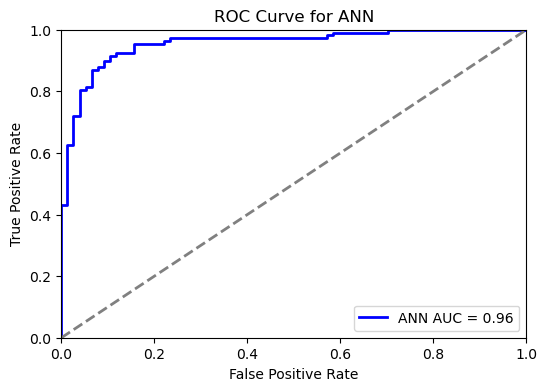

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ANN AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN')
plt.legend(loc="lower right")
plt.show()


Accuracy of the ANN: 0.90
Classification Report for ANN:
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        77
           1       0.95      0.87      0.91       107

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



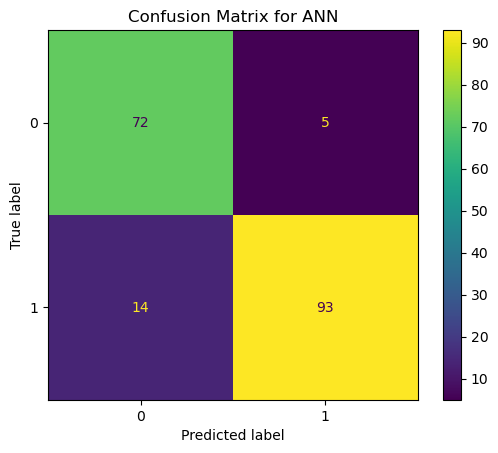

In [12]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = (y_pred_prob > 0.5).astype(int)  
accuracy = accuracy_score(y_test, y_pred) 
print(f"Accuracy of the ANN: {accuracy:.2f}")  

print("Classification Report for ANN:")  
print(classification_report(y_test, y_pred))  

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix for ANN')  # Optionally add a title
plt.show()  # Show the confusion matrix plot
